## Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

### Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

### Tentang Dataset MNIST
Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

### Detail Kuis
1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!
2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.
3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk: 
(1)Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
(2)Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.
4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.
5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
(1)Anda diperbolehkan untuk melakukan tunning parameter.
(2)Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.
6. Evaluasi model yang Anda buat terhadap data training dan data testing.
(1)Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
(2)Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
(3)Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.
7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.
8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

### Bantuan
Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Jumlah data untuk label 0: 6903
Jumlah data untuk label 1: 7877
Jumlah data untuk label 2: 6990
Jumlah data untuk label 3: 7141
Jumlah data untuk label 4: 6824
Jumlah data untuk label 5: 6313
Jumlah data untuk label 6: 6876
Jumlah data untuk label 7: 7293
Jumlah data untuk label 8: 6825
Jumlah data untuk label 9: 6958


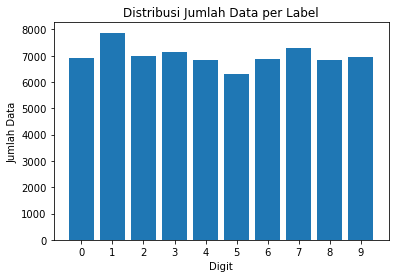

In [5]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Jumlah data untuk label {i}: {label_counts[i]}")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10))
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

### Nomor 2

In [6]:
# Mengambil data dan target dari dataset MNIST
X, y = mnist.data.to_numpy(), mnist.target.astype(int)
# 2. Menampilkan 15 Citra Pertama

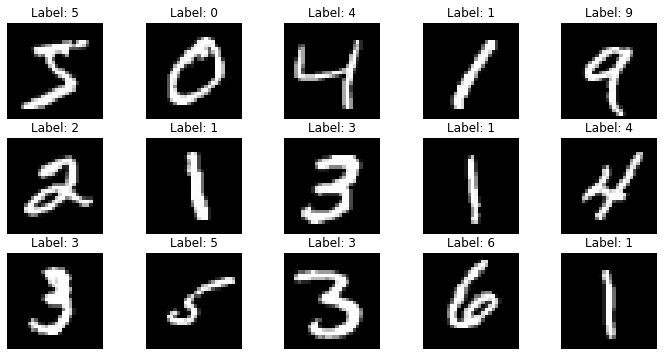

In [7]:
# 2. Menampilkan 15 Citra Pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

### Nomer 3

In [8]:
# Menghitung histogram untuk setiap gambar
histograms = np.array([np.histogram(image.reshape(28, 28), bins=256, range=(0, 256))[0] for image in X])

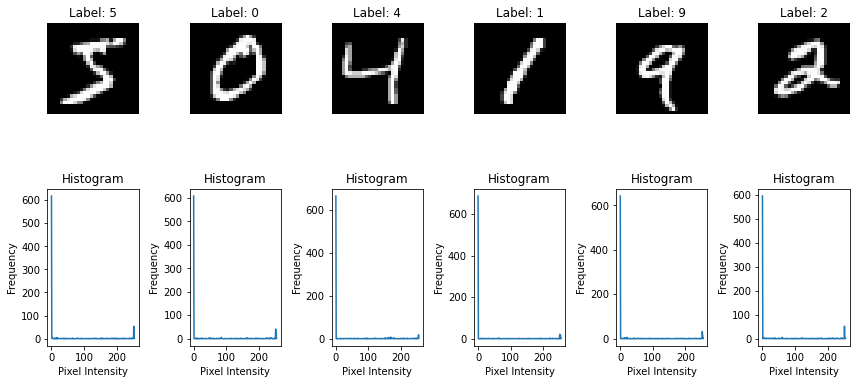

In [9]:
# Display a 2x3 grid of images, labels, and histograms
num_images_to_display = 6

plt.figure(figsize=(12, 8))

for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

    plt.subplot(3, num_images_to_display, num_images_to_display + i + 1)
    plt.plot(histograms[i])
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Nomor 4

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [11]:
# Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [13]:
svc = SVC(C=5.0, gamma=0.05, kernel='linear')  # You can adjust C and gamma based on your needs
svc.fit(X_train, y_train)

SVC(C=5.0, gamma=0.05, kernel='linear')

In [14]:
# Predict on the test set
y_pred = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9285
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1357
           1       0.95      0.98      0.96      1553
           2       0.90      0.92      0.91      1416
           3       0.89      0.92      0.91      1477
           4       0.93      0.95      0.94      1396
           5       0.90      0.88      0.89      1228
           6       0.96      0.96      0.96      1376
           7       0.94      0.92      0.93      1477
           8       0.92      0.87      0.89      1353
           9       0.93      0.90      0.92      1367

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



In [15]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1313    0    8    5    3    8   11    2    7    0]
 [   0 1524    7    6    2    1    0    3    8    2]
 [  10   14 1308   20   12    8   10   12   19    3]
 [   4    9   33 1363    0   43    1    4   15    5]
 [   2    3   11    0 1333    3    8    8    4   24]
 [  17    5   12   62    5 1083    9    5   18   12]
 [  14    4   14    0   13   14 1315    0    2    0]
 [   4   14   19   16   22    4    0 1359    8   31]
 [   9   27   32   42    6   33   13    9 1173    9]
 [   9    6   10   11   37    5    0   44   17 1228]]


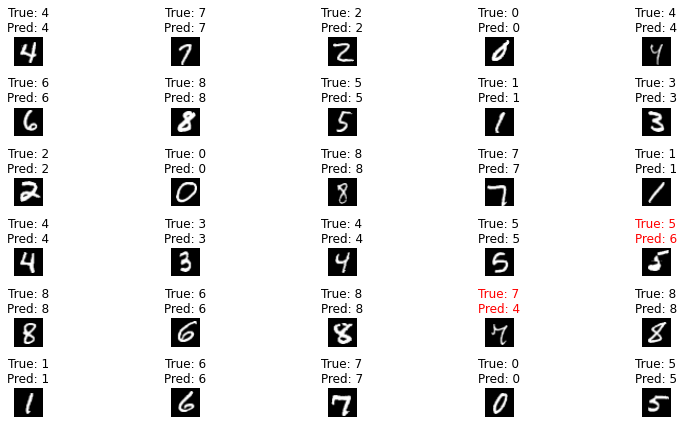

In [16]:
n_samples_to_display = 30
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred.iloc[i] if isinstance(y_pred, pd.Series) else y_pred[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()